In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
from tensorflow.keras import layers

2024-07-24 08:04:10.565514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 08:04:10.565641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 08:04:10.696121: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
tf.__version__

'2.15.0'

In [3]:
import os

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 64
EPOCHS = 50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/daily-fooddatasetmain/images",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE )

Found 998 files belonging to 10 classes.


In [5]:
class_names = dataset.class_names
class_names

['Mapo_Tofu',
 'Marinated_cold_cucumber',
 'Millet_congee',
 'Minced_Pork_Congee_with_Preserved_Egg',
 'Steamed_pork_with_rice_powder',
 'Steamed_vermicelli_roll',
 'Sweet_dumplings',
 'Sweet_mung_bean_soup',
 'Tea_eggs',
 'Tofu_with_Preserved_Eggs']

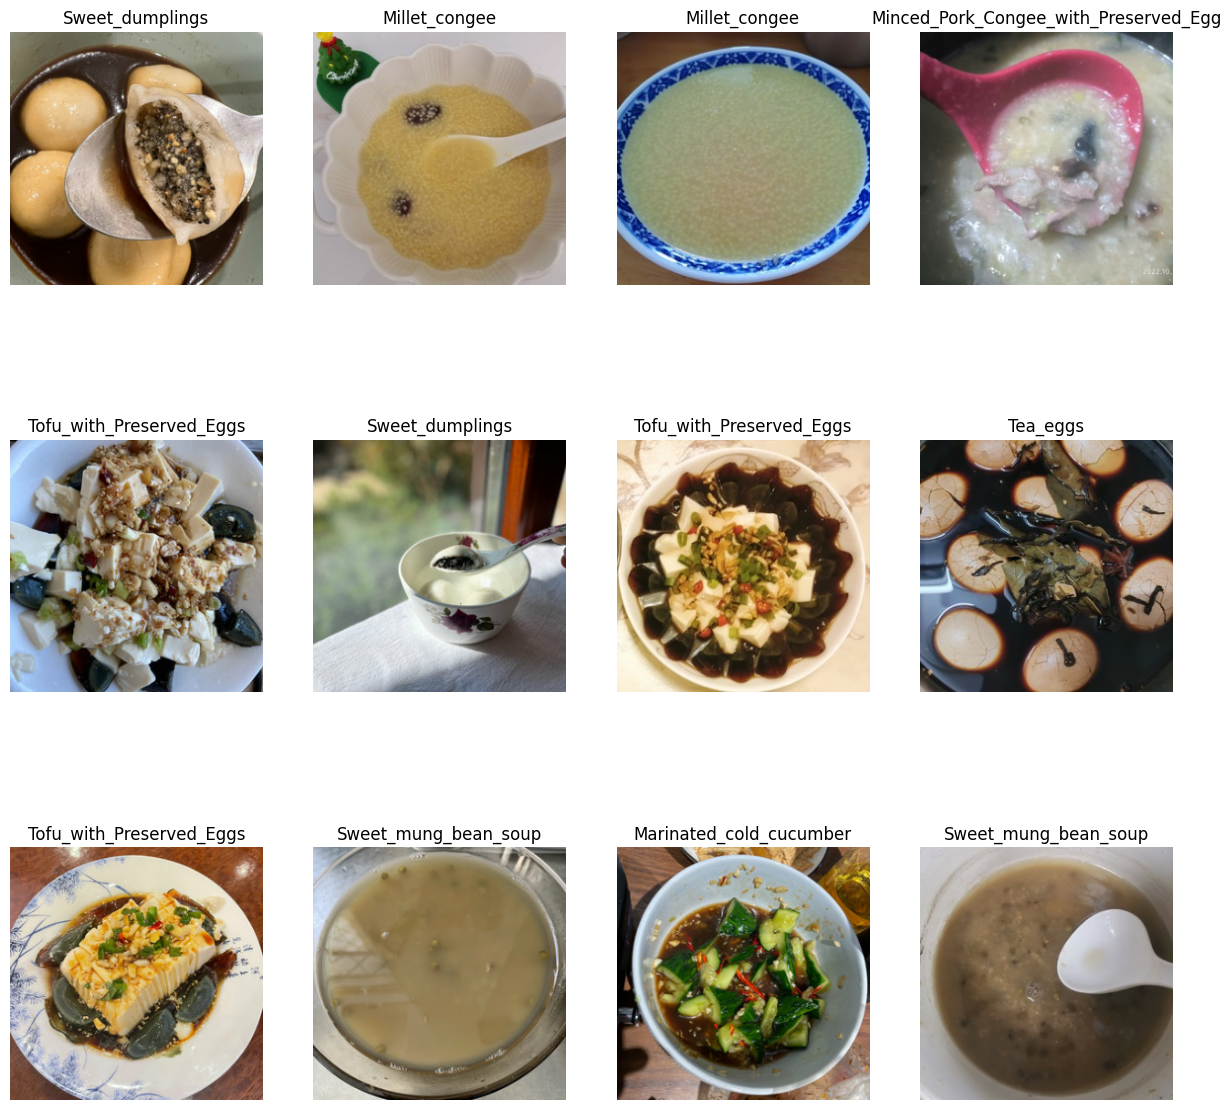

In [6]:
plt.figure(figsize = (15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        a = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
def get_dataset_partitions_tf(ds,train_split = 0.8,test_split = 0.1,val_split = 0.1,shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,test_ds,val_ds

In [8]:
train_ds , test_ds, val_ds = get_dataset_partitions_tf(dataset)

In [9]:
len(train_ds)

12

In [10]:
len(test_ds)

3

In [11]:
len(val_ds)

1

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
        layers.Resizing(256,256),
        layers.Rescaling(1.0/255)
    ])

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [15]:
input_shape = (32,256,256,3)
n_classes = len(class_names)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax'),
])
model.build(input_shape = input_shape)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# # added
# filter_sizes = [32, 64]
# batch_sizes = [16, 32]
# learning_rates = [0.001]


In [17]:
# # added
# # Function to create and compile the model with given hyperparameters
# def create_model(filter_size, learning_rate):
#     input_shape = (32,256,256,3)
#     n_classes = len(class_names)
#     model = models.Sequential([
#         resize_and_rescale,
#         data_augmentation,
#         layers.Conv2D(filter_size, (3, 3), activation='relu', input_shape=input_shape),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(filter_size*2, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(filter_size*2, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(filter_size*4, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Flatten(),
#         layers.Dense(256, activation='relu'),
#         layers.Dense(n_classes, activation='softmax'),
#     ])
#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#         metrics=['accuracy']
#     )
#     return model

In [18]:
# # addeed
# # Function to train the model with given hyperparameters
# def train_model(model, train_ds, val_ds):
#     history = model.fit(
#         train_ds,
#         epochs=EPOCHS,
#         batch_size=BATCH_SIZE,
#         verbose=1,
#         validation_data=val_ds
#     )
#     return history

In [19]:
# # added
# # Function to evaluate the model on the test dataset and print accuracy
# def evaluate_model(model, test_ds):
#     scores = model.evaluate(test_ds)
#     print("Test Loss:", scores[0])
#     print("Test Accuracy:", scores[1])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 25088)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 256)              │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,555,530 (25.01 MB)

 Trainable params: 6,555,530 (25.01 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [22]:
# # added
# # Perform hyperparameter tuning
# for filter_size in filter_sizes:
#     for batch_size in batch_sizes:
#         for learning_rate in learning_rates:
#             print(f"Filter Size: {filter_size}, Batch Size: {batch_size}, Learning Rate: {learning_rate}")
#             # Create and compile the model
#             model = create_model(filter_size=filter_size, learning_rate=learning_rate)
#             # Train the model
#             history = train_model(model, train_ds, val_ds)
#             # Evaluate the model
#             evaluate_model(model, test_ds)
#             print()

In [23]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - accuracy: 0.1456 - loss: 2.3657 - val_accuracy: 0.2031 - val_loss: 2.1419
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.2458 - loss: 2.0209 - val_accuracy: 0.3594 - val_loss: 1.7382
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.4045 - loss: 1.6522 - val_accuracy: 0.4844 - val_loss: 1.5160
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.4673 - loss: 1.4365 - val_accuracy: 0.5156 - val_loss: 1.2023
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5317 - loss: 1.2389 - val_accuracy: 0.6250 - val_loss: 1.1417
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5655 - loss: 1.1677 - val_accuracy: 0.5312 - val_loss: 1.0611
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5880 - loss: 1.0788 - val_accuracy: 0.6094 - val_loss: 1.0138
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.5934 - loss: 1.0287 - val_accuracy: 0

In [24]:
scores = model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8802 - loss: 0.6094


In [25]:
scores

[0.5346925258636475, 0.8854166865348816]

In [26]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 12}

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0, 0.5, 'Loss')

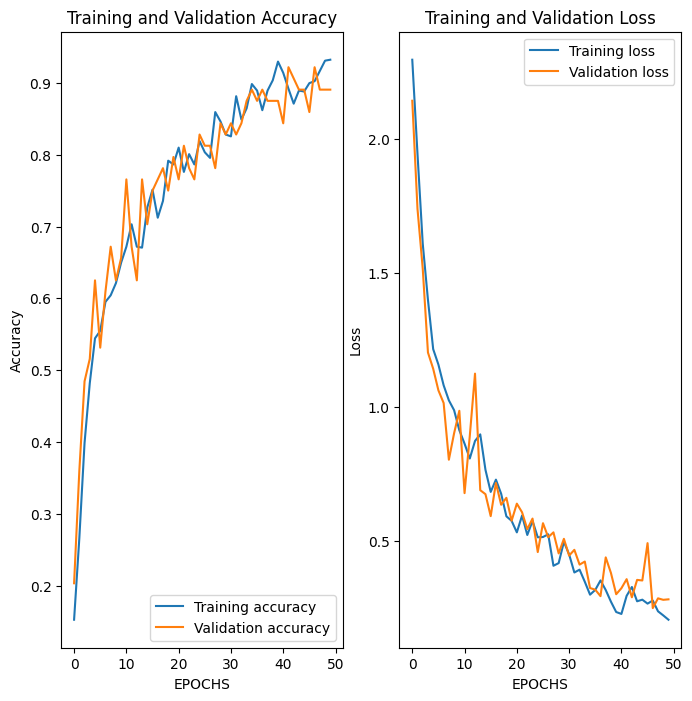

In [29]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.xlabel("EPOCHS")
plt.ylabel("Loss")



First Image to Predict:
Actual Label: Sweet_dumplings
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Predicted Label: Sweet_dumplings
First Image to Predict:
Actual Label: Steamed_vermicelli_roll
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label: Steamed_vermicelli_roll
First Image to Predict:
Actual Label: Minced_Pork_Congee_with_Preserved_Egg
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label: Minced_Pork_Congee_with_Preserved_Egg


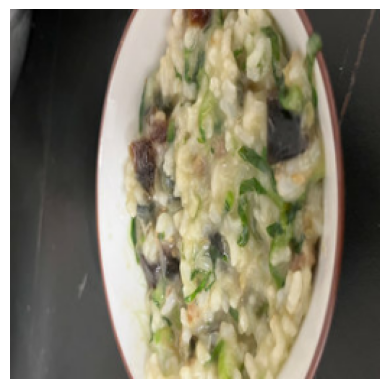

In [30]:
import numpy as np

for image_batch,label_batch in test_ds.take(30):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("First Image to Predict:")
    plt.imshow(first_image)
    plt.axis("off")
    print("Actual Label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [31]:
# import numpy as np

# # Set the number of predictions to show
# num_predictions = 10

# for image_batch, label_batch in test_ds.take(20):
#     for i in range(num_predictions):  # Iterate over the first `num_predictions` images in each batch
#         print(i)
#         img = image_batch[i].numpy().astype('uint8')
#         true_label = label_batch[i].numpy()
#         predicted_label, confidence = predict(model, img)
        
#         plt.figure()
#         plt.imshow(img)
#         plt.title(f"True: {class_names[true_label]}, Pred: {predicted_label}, Conf: {confidence}%")
#         plt.axis('off')
#         plt.show()


In [32]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

In [33]:
# # added
# def predict(model, img):
#     img_array = tf.keras.preprocessing.image.img_to_array(img)
#     img_array = tf.expand_dims(img_array, 0)

#     predictions = model.predict(img_array)

#     predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(100 * np.max(predictions[0]), 2)
#     return predicted_class, confidence


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


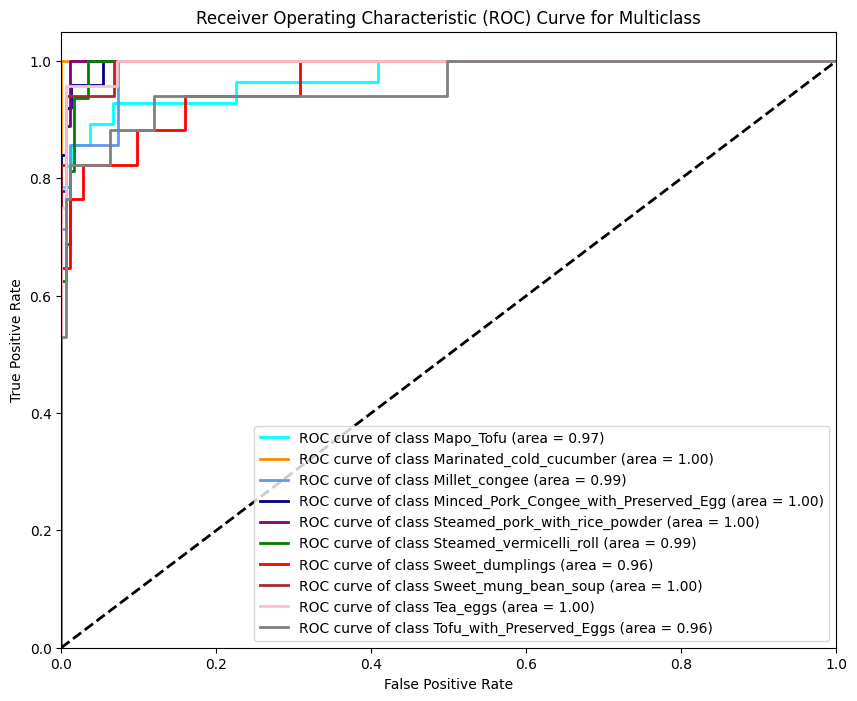

In [34]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def plot_multiclass_roc(model, test_ds, class_names):
    y_true = []
    y_scores = []

    # Collect true labels and predicted scores
    for image_batch, label_batch in test_ds:
        y_true.extend(label_batch.numpy())
        y_scores.extend(model.predict(image_batch))

    # Binarize the output
    y_true = label_binarize(y_true, classes=range(len(class_names)))
    y_scores = np.array(y_scores)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'purple', 'green', 'red', 'brown', 'pink', 'gray'])

    for i, color in zip(range(len(class_names)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

# Call the function to plot ROC curve and compute AUC
plot_multiclass_roc(model, test_ds, class_names)
